<h1 style="font-size:42px; text-align:center;">3. Feature Engineering</h1>
<hr>

In [180]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

In [181]:
# Load cleaned dataset
df = pd.read_csv('cleaned_df.csv')

In [182]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


Creating an indicator variable to flag properties with 2 beds and 2 baths and name it <code style="color:steelblue">'two_and_two'</code>.

In [183]:
two_and_two = (df.beds == 2) & (df.baths == 2) # Taking AND if both features, creating a mask.
df['two_and_two'] = two_and_two.astype(int) # Converting mask containg True/False to 1/0
df.shape

(1882, 27)

Display the proportion of our observations that have 2 beds and 2 baths.

In [184]:
df.two_and_two.mean()

0.09458023379383634

In [185]:
# 2013 to 2015 was a period of recession hence creating indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = df.tx_year.between(2010, 2013).astype(int)

In [186]:
# Percent of transactions where during_recession == 1
df.during_recession.mean()

0.2635494155154091

## Interaction features

Transaction price of a house also depends on the age of the property, hence creating <code style="color:steelblue">'property_age'</code> feature for the age of the property at the time of the transaction.

In [189]:
df['property_age'] = df.tx_year - df.year_built
df.shape

(1882, 29)

Check if any value has negative value in <code style="color:steelblue">'property_age'</code> as it is possible due to error in entry.

In [190]:
df.property_age.min()

-8

In [191]:
# No. of observations with negtive 'property_age'
sum(df.property_age < 0)

19

Removing these values as these values do not make sense. How could anyone sell a house before it was built? (Assuming no pre-booking)

In [192]:
df = df[df.property_age >= 0]
print(len(df))

1863


* Number of schools nearby <code style="color:steelblue">'num_schools'</code>
* Median quality score of schools is given in <code style="color:steelblue">'median_schools'</code>
These features can be combined by us to make a new one.

In [193]:
df['school_score'] = df.num_schools * df.median_school

# Group sparse classes
### <code style="color:steelblue">exterior_walls</code>

In [195]:
def plot_bar(feature, df):
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, y=feature)
    plt.show()

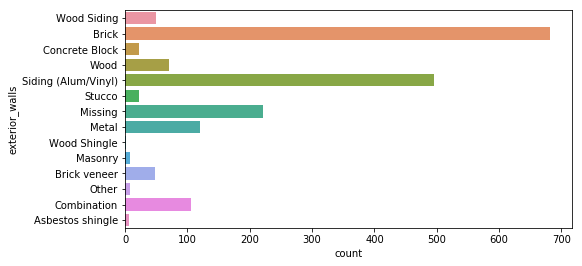

In [196]:
# Bar plot for exterior_walls
plot_bar('exterior_walls', df)

<code style="color:steelblue">'Wood Siding'</code>, <code style="color:steelblue">'Wood Shingle'</code>, and <code style="color:steelblue">'Wood'</code> can be labelled as <code style="color:crimson">'Wood'</code>.

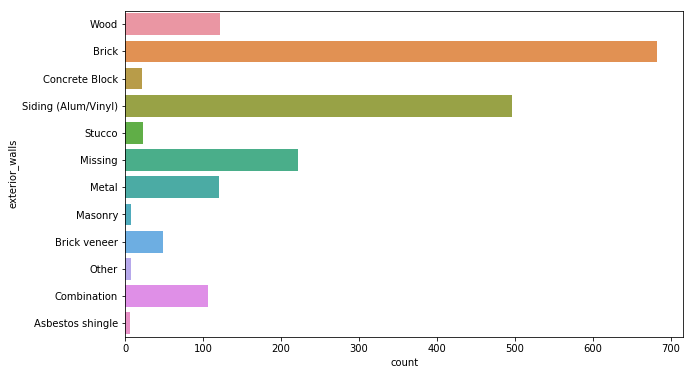

In [197]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle', 'Wood'], 'Wood', inplace=True)
plot_bar('exterior_walls', df)

<code style="color:steelblue">'Stucco'</code>, <code style="color:steelblue">'Other'</code>, <code style="color:steelblue">'Asbestos shingle'</code>, <code style="color:steelblue">'Concrete Block'</code>, and <code style="color:steelblue">'Masonry'</code> have very less observations, we can consider them labelling as <code style="color:crimson;">'Other'</code>:

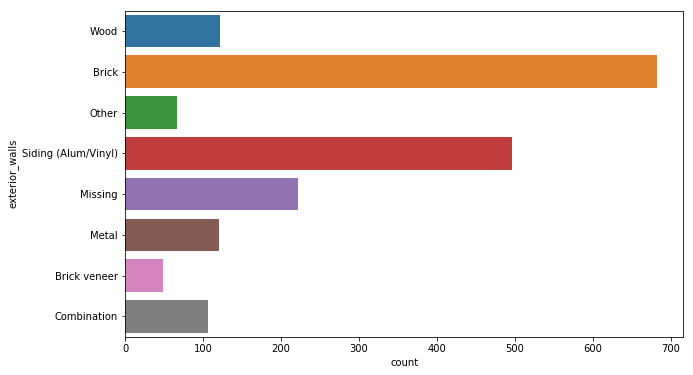

In [198]:
df.exterior_walls.replace(['Stucco', 'Other', 'Asbestos shingle', 'Concrete Block', 'Masonry'], 'Other', inplace=True)
plot_bar('exterior_walls', df)

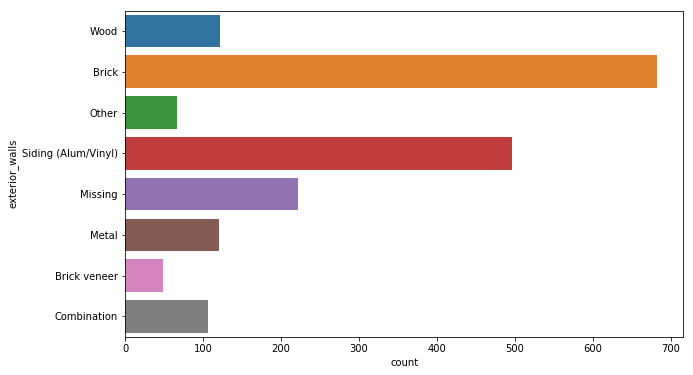

In [199]:
# Bar plot for exterior_walls
plot_bar('exterior_walls', df)

### <code style="color:steelblue">roof</code>

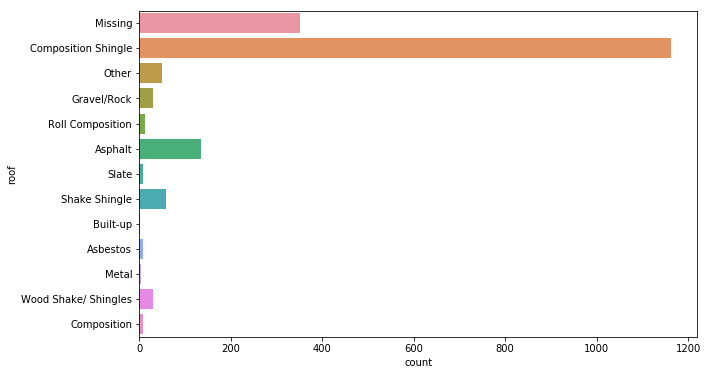

In [200]:
plot_bar('roof', df)

We can combine <code style="color:steelblue">'Composition'</code> and <code style="color:steelblue">'Wood Shake/ Shingles'</code> into the <code style="color:steelblue">'Composition Shingle'</code>

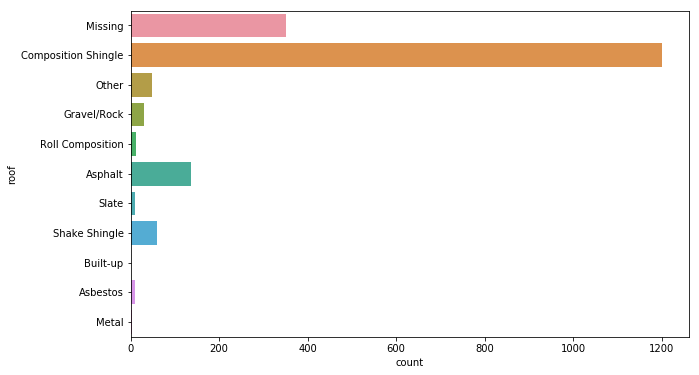

In [201]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)
plot_bar('roof', df)

Combining very sparse features <code style="color:steelblue">'Other'</code>, <code style="color:steelblue">'Gravel/Rock'</code>, <code style="color:steelblue">'Roll Composition'</code>, <code style="color:steelblue">'Slate'</code>, <code style="color:steelblue">'Built-up'</code>, <code style="color:steelblue">'Asbestos'</code>, and <code style="color:steelblue">'Metal'</code> as <code style="color:crimson">'Other'</code>

In [202]:
df.roof.replace(['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal'], 'Other', inplace=True)

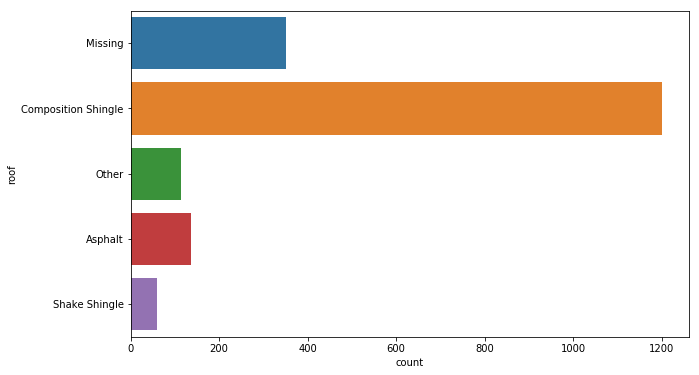

In [203]:
plot_bar('roof', df)

# Encode dummy variables

Machine learning algorithms expect numerical data as input and cannot handle categorical features.
Hence creating dummy variable for representing categorical data.

In [204]:
categorical_Index = df.dtypes[df.dtypes == 'object'].index
df = pd.get_dummies(data = df, columns = categorical_Index)
print(df.shape)

(1863, 42)


In [205]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,property_type_Apartment / Condo / Townhouse,property_type_Single-Family,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


# Remove unused or redundant features

We have already used the features <code style="color:steelblue">tx_year</code> and <code style="color:steelblue">year_built</code> to create <code style="color:steelblue">property_age</code>, hence we should remove them, they are of no use.<br>
**This would also reduce dimentionality of the data.**

In [206]:
df = df.drop(columns = 'tx_year')
print(df.shape)
df = df.drop('year_built', axis=1) # axis=1 is the vertical axis and while giving labels value as parameter, axis is mandatory.
df.shape

(1863, 41)


(1863, 40)

In [207]:
# Save new base table as final_features
df.to_csv('final_features.csv', index=None)